In [56]:
# I will be using LSTM model to predict 'GOOGL' stock price in the future.
# First I will import all the required libraries for this model

import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [57]:
#Load 'GOOGL' stock history from 'yahoo'
df = web.DataReader('GOOGL', data_source='yahoo', start='2014-01-01', end='2020-11-20')
 
#show the data
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,559.434448,554.684692,558.288269,557.117126,3639100.0,557.117126
2014-01-03,559.024048,553.018005,558.058044,553.053040,3330000.0,553.053040
2014-01-06,559.989990,553.773804,557.062073,559.219238,3535000.0,559.219238
2014-01-07,570.415405,561.141113,563.063049,570.000000,5100000.0,570.000000
2014-01-08,574.234253,567.212219,573.573547,571.186157,4480500.0,571.186157


In [58]:
#Get the data metrices
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1736.000000,1736.000000,1736.000000,1736.000000,1.736000e+03,1736.000000
mean,950.988290,933.107134,942.246668,942.358788,2.007375e+06,942.358788
std,309.309658,301.878313,305.190696,305.726724,1.095319e+06,305.726724
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998
25%,681.469986,666.824997,675.145004,672.917480,1.356100e+06,672.917480
50%,948.525024,935.879974,943.075012,942.095001,1.692850e+06,942.095001
75%,1178.350037,1154.692505,1165.167542,1168.172485,2.275500e+06,1168.172485
max,1816.890015,1761.329956,1795.979980,1774.030029,1.285810e+07,1774.030029


In [59]:
#Get the number of rows and columns in the data set
df.shape

(1736, 6)

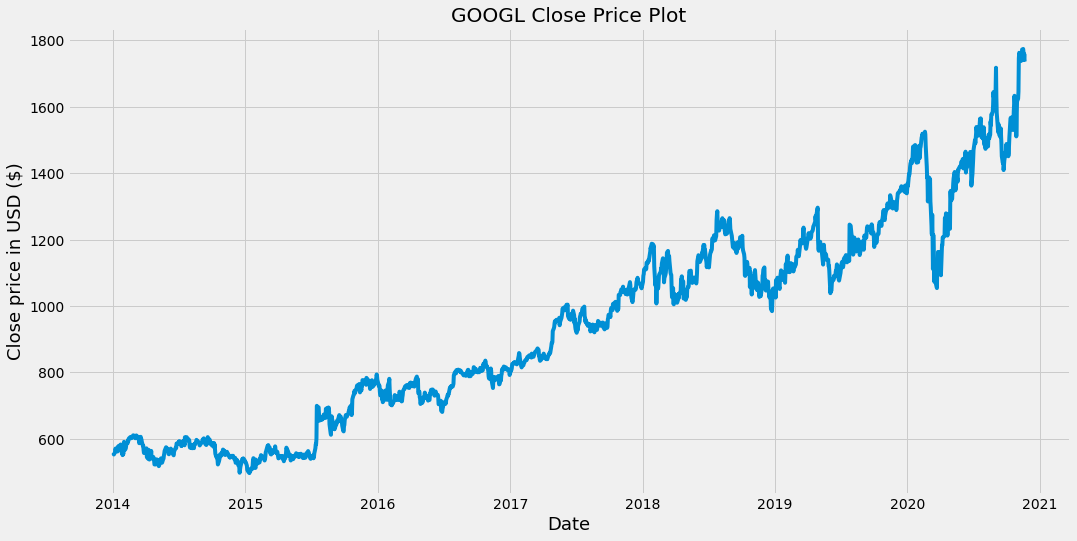

In [60]:
#Visualize the 'GOOGL' data-set, closing price
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.title('GOOGL Close Price Plot')
plt.plot(df['Close'])
plt.show()


In [61]:
#Create DataFrame with only 'Close' column
data = df.filter(['Close'])
#Convert the DataFrame to numpy array
dataset = data.values
#Get the number to rows ro train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1389

In [62]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.04703096],
       [0.04384836],
       [0.04867713],
       ...,
       [0.97385215],
       [0.98789315],
       [0.97051613]])

In [63]:
# Create the training data set 
#Create the scaled traning data set 
train_data = scaled_data[0:training_data_len, :]
#Split the data in X_train and y_train data set
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(X_train)
    print(y_train)
    print()



[array([0.04703096, 0.04384836, 0.04867713, 0.05711959, 0.05804847,
       0.05374102, 0.0537175 , 0.05089553, 0.06125067, 0.06094496,
       0.06392371, 0.06169356, 0.06685547, 0.06737283, 0.06544446,
       0.05122867, 0.04237072, 0.05090729, 0.04460092, 0.05575953,
       0.07362432, 0.05499134, 0.05684523, 0.05882063, 0.06538959,
       0.07224079, 0.07047312, 0.07723413, 0.07586628, 0.08104383,
       0.08218049, 0.08534736, 0.0820002 , 0.08269392, 0.0825685 ,
       0.08598626, 0.0889219 , 0.08898853, 0.08861227, 0.08721694,
       0.08213737, 0.0869269 , 0.08823993, 0.08876904, 0.08687987,
       0.08561784, 0.0810791 , 0.08394424, 0.07679517, 0.07042217,
       0.07798669, 0.0854963 , 0.08078907, 0.07996993, 0.07443567,
       0.06459397, 0.06490359, 0.05441911, 0.04748561, 0.04978631])]
[0.04757575049313212]

[array([0.04703096, 0.04384836, 0.04867713, 0.05711959, 0.05804847,
       0.05374102, 0.0537175 , 0.05089553, 0.06125067, 0.06094496,
       0.06392371, 0.06169356, 0.06

In [64]:
#Convert X_train and y_train into numpy array 
X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
#Reshape the dataset. LSTM assumes the data is 3 dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1329, 60, 1)

In [66]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [67]:
#Compile the model. Use 'adam' and 'mse', 'mse' determines the degree of errors and 'adam' optimizes 'mse'
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
#Train the model using '.fit' method
model.fit(X_train, y_train, batch_size=3, epochs=10)

Epoch 1/10
443/443 [==============================] - 12s 28ms/step - loss: 2.1475e-04
Epoch 2/10
443/443 [==============================] - 12s 28ms/step - loss: 1.9578e-04
Epoch 3/10
443/443 [==============================] - 12s 27ms/step - loss: 2.0056e-04
Epoch 4/10
443/443 [==============================] - 12s 28ms/step - loss: 1.7614e-04
Epoch 5/10
443/443 [==============================] - 12s 27ms/step - loss: 1.8354e-04
Epoch 6/10
443/443 [==============================] - 12s 28ms/step - loss: 1.5834e-04
Epoch 7/10
443/443 [==============================] - 12s 27ms/step - loss: 1.6222e-04
Epoch 8/10
443/443 [==============================] - 12s 27ms/step - loss: 1.7698e-04
Epoch 9/10
443/443 [==============================] - 12s 27ms/step - loss: 1.7520e-04
Epoch 10/10
443/443 [==============================] - 12s 27ms/step - loss: 1.7266e-04


In [79]:
#Create test data set. Create a new array containing scaled values from row 1380 to 1725
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [80]:
#Convert the data into numpy array 
X_test = np.array(X_test)

In [81]:
#Reshape to 3 dimensions in order to load into LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(347, 60, 1)

In [82]:
#Get the model predicted values and inverse the scaled data to make sure the X_test values are same as y_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [83]:
#Evaluate the model using root mean squared error (RMSE). Lower the RMSE the better model performs
rmse = np.sqrt( np.mean(predictions - y_test)** 2)
rmse
#RMSE of 4.44 is decent

0.6336585492840417

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


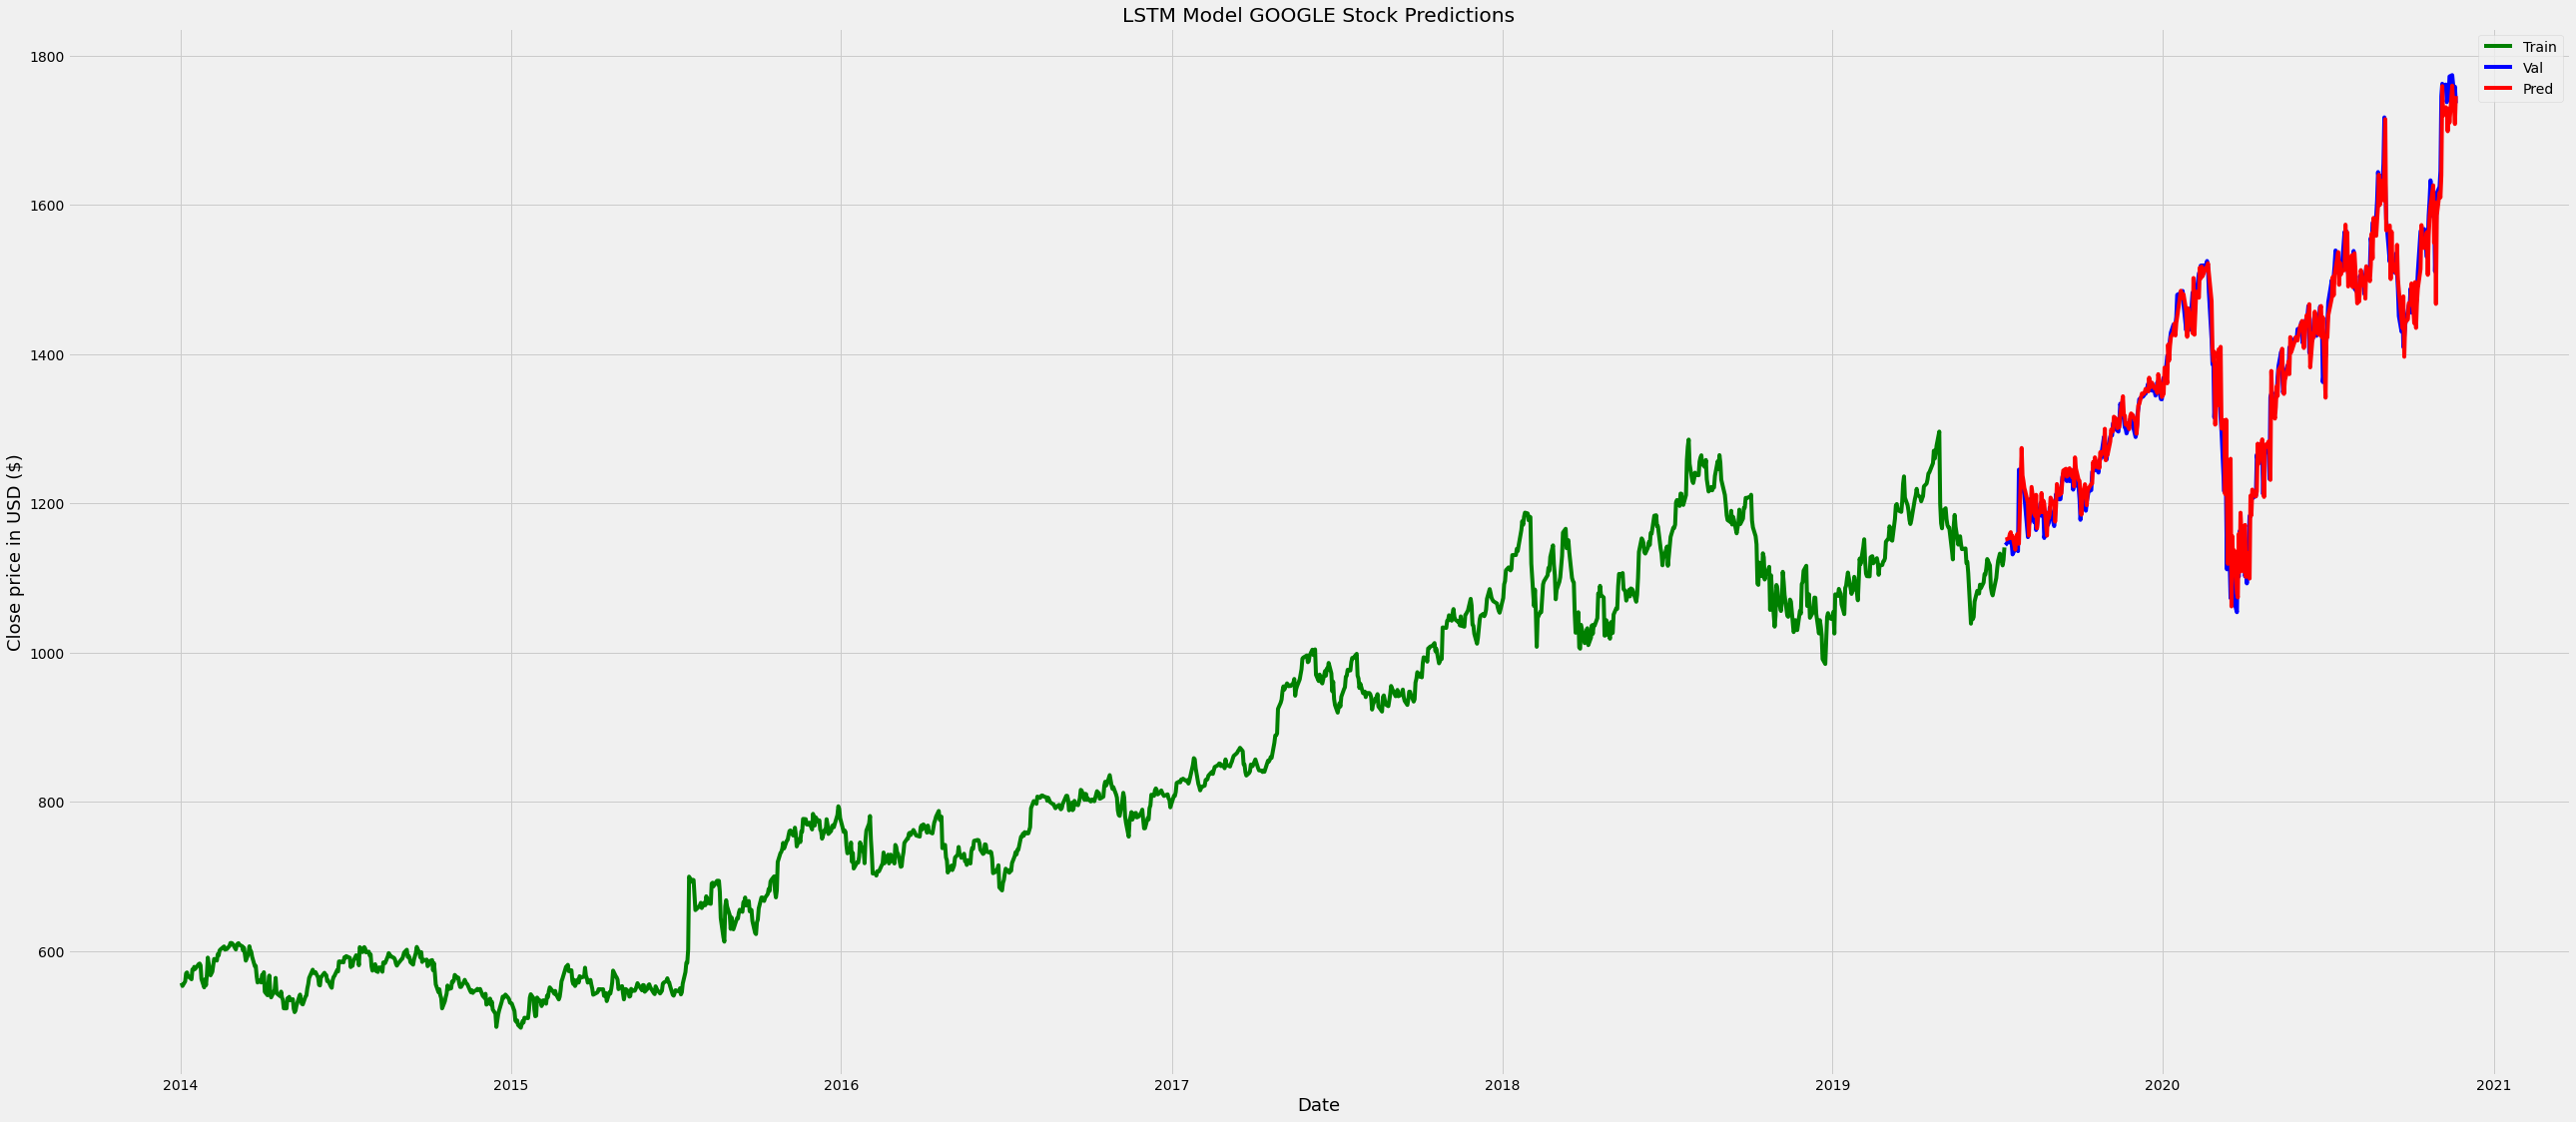

In [84]:
#Visualize the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Plot the data
plt.figure(figsize=(40, 18))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.title('LSTM Model GOOGLE Stock Predictions')
plt.plot(train['Close'], color = 'green')
plt.plot(valid['Close'], color = 'blue')
plt.plot(valid['Predictions'], color='red')
plt.legend(['Train', 'Val', 'Pred'])
plt.show()
# 'green' line is the close price since 2014, 'blue' is actual price, and 'red' is predicted price

In [85]:
#Show the Valid and Predicted prices 
valid

,Close,Predictions
Date,,
2019-07-11,1144.079956,1151.396606
2019-07-12,1145.339966,1151.630127
2019-07-15,1150.510010,1153.216309
2019-07-16,1153.459961,1159.037231
2019-07-17,1146.739990,1161.395386
...,...,...
2020-11-16,1774.030029,1759.937866
2020-11-17,1761.660034,1737.926514
2020-11-18,1740.640015,1731.535034


In [86]:
#Predict the future stock prices
#get the quote
googl_quote = web.DataReader('GOOGL', data_source='yahoo', start='2014-01-01', end='2020-11-25')
#Create new data frame with 'Close' price
new_df = googl_quote.filter(['Close'])
#Get the last 60 days of new_df and convert into an array
last_60_days = new_df[-60:].values
#Scale the data in between (0,1)
scaled_60_days = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the scaled data to X_test
X_test.append(scaled_60_days)
#Convert to array
X_test = np.array(X_test)
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Inverse the scaling
pred_price = scaler.inverse_transform(pred_price)
#print the predicted price for 2020-11-20
print(pred_price)

[[1731.6361]]


In [87]:
#Print the actual stock price for 2020-11-20
googl_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2020-11-25', end='2020-11-25')
print(googl_quote2)
#The model's prediction is 99% accurate

                   High          Low  ...  Volume    Adj Close
Date                                  ...                     
2020-11-25  1770.380005  1748.979980  ...  979957  1764.130005
2020-11-25  1770.380005  1748.359985  ...  980000  1764.130005

[2 rows x 6 columns]
